# I-94 Traffic Analysis

This project centers around I-94 Interstate traffic and determining what indicators are related to heavier traffic. The data was collected by a station on I-94 between Minneapolis and St. Paul on westbound traffic only. This is the only point of data collection refelcted in this dataset, so our findings can't be applied to the entriety of the the I-94. 

To begin, let's read in the csv file into pandas and get a first look at the data:

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline

i_94 = pd.read_csv('Metro_Interstate_Traffic_Volume.csv')
i_94.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              61 non-null     object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


In [3]:
i_94.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,NaN,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,NaN,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,NaN,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,NaN,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,NaN,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [4]:
i_94.tail()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
48199,NaN,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,NaN,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,NaN,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,NaN,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450
48203,NaN,282.12,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 23:00:00,954


From the first look at the dataset, it contains over 48,000 lines of data between the dates of October 2012 and September 2018. There is also weather data showing the temperature, the time of rain and snow for an hour, how many clouds, the main weather condition, and an overall description. The date is also encoded with an hour, and there is an overall traffic volume count for the hour and whether or not there is a holiday on that day. 

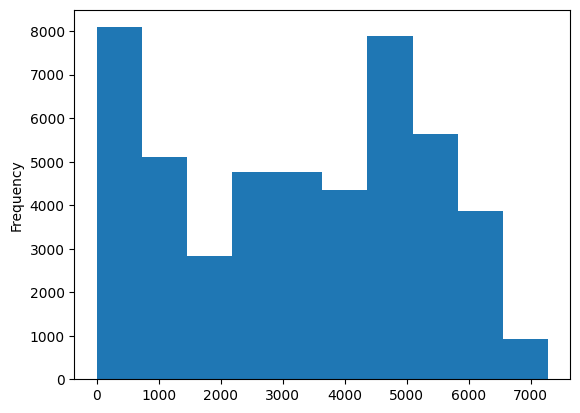

In [3]:
i_94['traffic_volume'].plot.hist()
plt.show()

In [5]:
i_94['traffic_volume'].describe()

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

Based on the output, we can see that there are two disinct peaks in ths histograms. 25% of the time, traffic is under 1,986 cars, and the other 25% of the time, there are over 4,933 cars on the road. This difference leads us to believe there is likely a pattern of less traffic at night, and more traffic durring the day. The average traffic volume is 3,260 so, it seems more likely that there is more day traffic versus nighttime traffic. 

Now that we understand that there is liklely a daytime versus nighttime traffic difference, let's divide the date_time column into day and night time blocks:

Daytime: 7am-7pm (12 hours)
Nighttime: 7pm-7am (12 hours)

To start, let's first change the data type of the `date_time` column to datetime. 

In [6]:
i_94['date_time'] = pd.to_datetime(i_94['date_time'])

day = i_94.copy()[(i_94['date_time'].dt.hour >= 7) & (i_94['date_time'].dt.hour < 19)]
print(day.shape)

night = i_94.copy()[(i_94['date_time'].dt.hour >= 19) | (i_94['date_time'].dt.hour < 7)]
print(night.shape)

(23877, 9)
(24327, 9)


There seems to be around 500 less rows of data for daytime data versus nighttime. This is likely due to missing hours of data being more frequent for daytime data. 

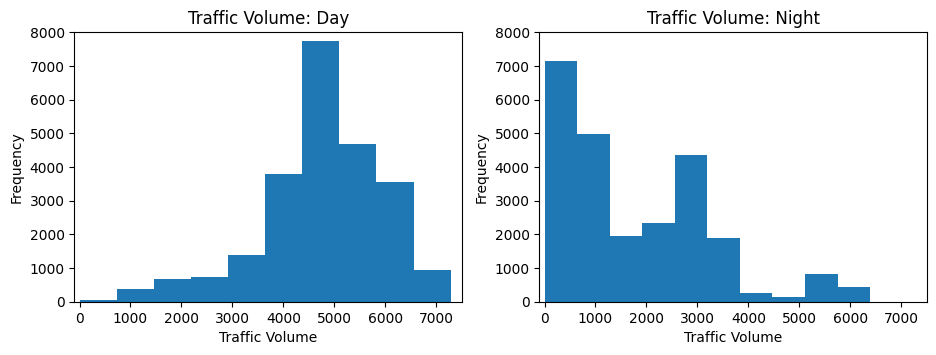

In [7]:
plt.figure(figsize=(11,3.5))

plt.subplot(1, 2, 1)
plt.hist(day['traffic_volume'])
plt.xlim(-100, 7500)
plt.ylim(0, 8000)
plt.title('Traffic Volume: Day')
plt.ylabel('Frequency')
plt.xlabel('Traffic Volume')

plt.subplot(1, 2, 2)
plt.hist(night['traffic_volume'])
plt.xlim(-100, 7500)
plt.ylim(0, 8000)
plt.title('Traffic Volume: Night')
plt.ylabel('Frequency')
plt.xlabel('Traffic Volume')

plt.show()

In [9]:
day['traffic_volume'].describe()


count    23877.000000
mean      4762.047452
std       1174.546482
min          0.000000
25%       4252.000000
50%       4820.000000
75%       5559.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In [10]:
night['traffic_volume'].describe()

count    24327.000000
mean      1785.377441
std       1441.951197
min          0.000000
25%        530.000000
50%       1287.000000
75%       2819.000000
max       6386.000000
Name: traffic_volume, dtype: float64

After isolating the day and night traffic, it's more clear that the night traffic has lower traffic volume compared to the daytime traffic. Daytime traffic has a mean of 4,762 cars versus nighttime traffic having a mean of 1,785. The nighttime traffic 75% of the time has 2,819 cars or less, while 25% of daytime traffic is 4,252 cars or less. This shows that the daytime traffic is much heavier than the nighttime traffic. 

Looking at the shape of the histograms, we also see that daytime traffic resembles a normal distribution versus the nighttime distribution that is left skewed. These distributons make sense based on the circumstances. Daytime traffic is likely to have a more normal distribution because the quadrants are closer together than the nighttime traffic quadrants that favor the lower traffic volume with a maximum that is over double the 75% quadrant. 

Since the goal of the analysis is to find heavy traffic indicators, the daytime traffic is more suited to our analysis.

In [11]:
day['month'] = day['date_time'].dt.month
by_month = day.groupby('month').mean(numeric_only=True)
by_month['traffic_volume']

month
1     4495.613727
2     4711.198394
3     4889.409560
4     4906.894305
5     4911.121609
6     4898.019566
7     4595.035744
8     4928.302035
9     4870.783145
10    4921.234922
11    4704.094319
12    4374.834566
Name: traffic_volume, dtype: float64

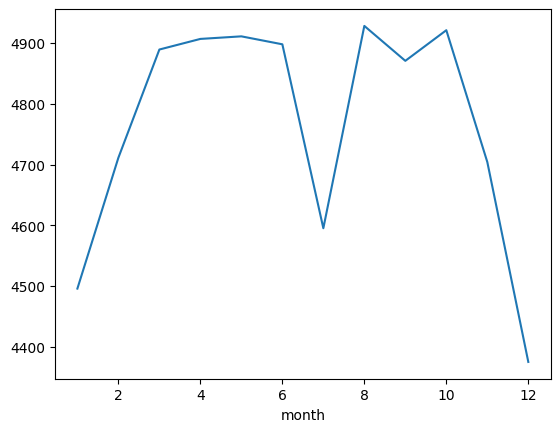

In [12]:
by_month['traffic_volume'].plot.line()
plt.show()

The mean of July shows a dip of about 300 cars in the higher summer months. December and January are the lowest month with an average of ~4,375 cars and ~4,496 cars, respectively. Let's take a look at the July months over the year to better understand this dip.

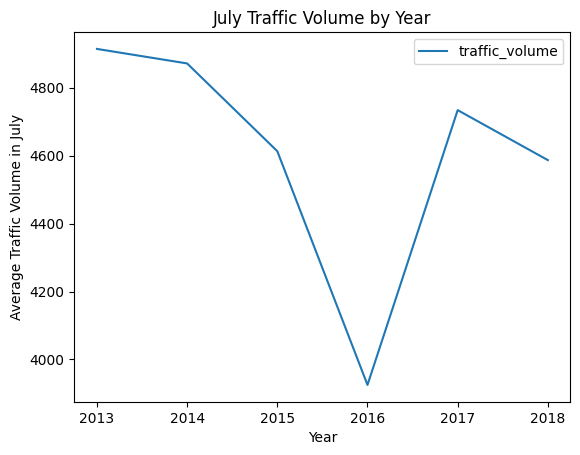

In [32]:
day['year'] = day['date_time'].dt.year
only_july = day[day['month'] == 7]
only_july_grouped = only_july.groupby('year')[['traffic_volume']].mean()
only_july_grouped.plot.line()
plt.xlabel('Year')
plt.ylabel('Average Traffic Volume in July')
plt.title('July Traffic Volume by Year')
plt.show()


Based on our line chart, there is a significant dip in traffic volume in 2016. After some quick research, it's confirmed 

In [13]:
day['dayofweek'] = day['date_time'].dt.dayofweek
by_dayofweek = day.groupby('dayofweek').mean(numeric_only=True)
by_dayofweek['traffic_volume']  # 0 is Monday, 6 is Sunday

dayofweek
0    4893.551286
1    5189.004782
2    5284.454282
3    5311.303730
4    5291.600829
5    3927.249558
6    3436.541789
Name: traffic_volume, dtype: float64

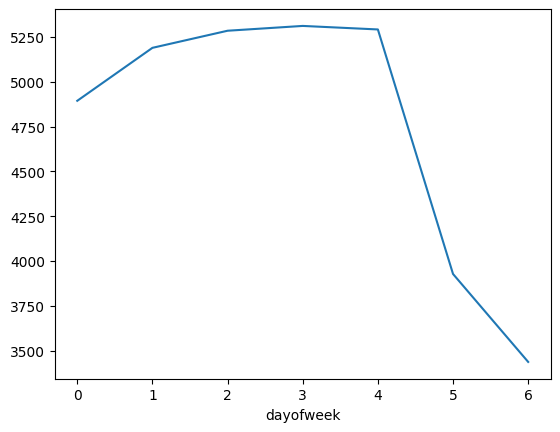

In [17]:
by_dayofweek['traffic_volume'].plot.line()
plt.show()

Data shows that the the weekday traffic is higher than the weekend traffic. This is likely due to work traffic on weekdays. 

In [18]:
day['hour'] = day['date_time'].dt.hour
business_days = day.copy()[day['dayofweek'] <= 4] # 4 == Friday
weekend = day.copy()[day['dayofweek'] >= 5] # 5 == Saturday
by_hour_business = business_days.groupby('hour').mean(numeric_only=True)
by_hour_weekend = weekend.groupby('hour').mean(numeric_only=True)

print(by_hour_business['traffic_volume'])
print(by_hour_weekend['traffic_volume'])

hour
7     6030.413559
8     5503.497970
9     4895.269257
10    4378.419118
11    4633.419470
12    4855.382143
13    4859.180473
14    5152.995778
15    5592.897768
16    6189.473647
17    5784.827133
18    4434.209431
Name: traffic_volume, dtype: float64
hour
7     1589.365894
8     2338.578073
9     3111.623917
10    3686.632302
11    4044.154955
12    4372.482883
13    4362.296564
14    4358.543796
15    4342.456881
16    4339.693805
17    4151.919929
18    3811.792279
Name: traffic_volume, dtype: float64


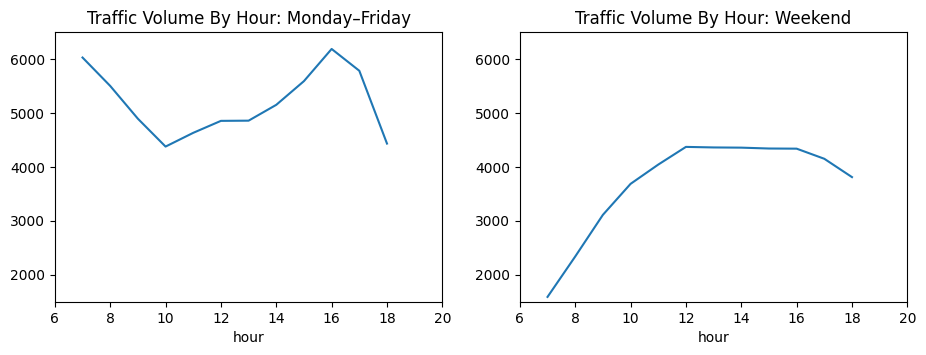

In [19]:
plt.figure(figsize=(11,3.5))

plt.subplot(1, 2, 1)
by_hour_business['traffic_volume'].plot.line()
plt.xlim(6,20)
plt.ylim(1500,6500)
plt.title('Traffic Volume By Hour: Monday–Friday')

plt.subplot(1, 2, 2)
by_hour_weekend['traffic_volume'].plot.line()
plt.xlim(6,20)
plt.ylim(1500,6500)
plt.title('Traffic Volume By Hour: Weekend')

plt.show()

On the weekdays, there are a lot more traffic in the morning (7am-8am) and the afternoon (4pm-5pm). This is likely due to the work commute traffic to and from work. In contrast, the weekend traffic is heavier mid-day (noon to 4pm), but is still less traffic than the weekdays. Work commuting is likely an indicator of heavy traffic, that is weekdays between (7am-8am) and (4pm-5pm). 

Now that we know that the time indicators of heavy traffic are the warmer months (March-October) and on weekdays in the morning and afternoon, let's look at the weather indicators for heavy traffic. There are some columns with numeric data types that we'll start with and find the correlation between them and the traffic volume. 

In [23]:
correlation = day.select_dtypes(include='number').corr()['traffic_volume']
print(correlation)

temp              0.128317
rain_1h           0.003697
snow_1h           0.001265
clouds_all       -0.032932
traffic_volume    1.000000
month            -0.022337
dayofweek        -0.416453
year             -0.003557
hour              0.172704
Name: traffic_volume, dtype: float64


Based on the correlations, the `temp` column is the most likely weather indicator for traffic volume. The correlation coefficient for the temp column tells us that the temperature explains about 12.8% of the variation in traffic. The other stronger correlations are the `dayofweek` column and the `hour` column. That we were already aware of based on our previous queries. 

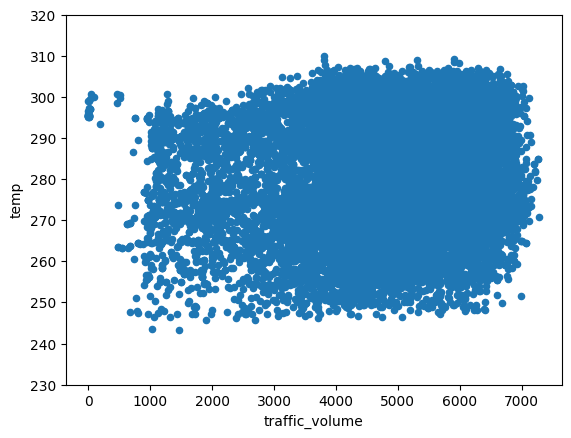

In [25]:
day.plot.scatter('traffic_volume', 'temp')
plt.ylim(230, 320) # two wrong 0K temperatures mess up the y-axis
plt.show()

After looking at the scatter plot, the temperature is not a reliable heavy traffic indicator. Now, we'll focus the other two non-numeric weather columns `weather_main` and `weather_description`.

In [24]:
by_weather_main = day.groupby('weather_main').mean(numeric_only=True)
by_weather_description = day.groupby('weather_description').mean(numeric_only=True)

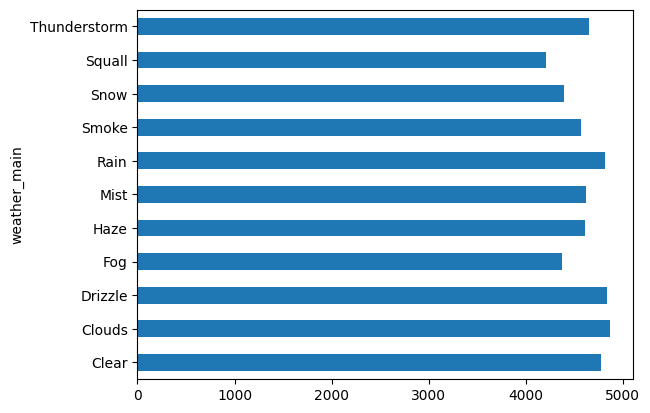

In [26]:
by_weather_main['traffic_volume'].plot.barh()
plt.show()

Based on the horizontal bar chat, the weather conditions all fall between the traffic volumes 4000-5000 cars on average with none of the listed weather conditions exceed 5000 cars. The largest traffic volumes based on the chart are Thunderstorms, Rain, Drizzle, and Clouds, but the difference between these weather conditions and the others is farily minimal, so these aren't strong heavy traffic indicators. 

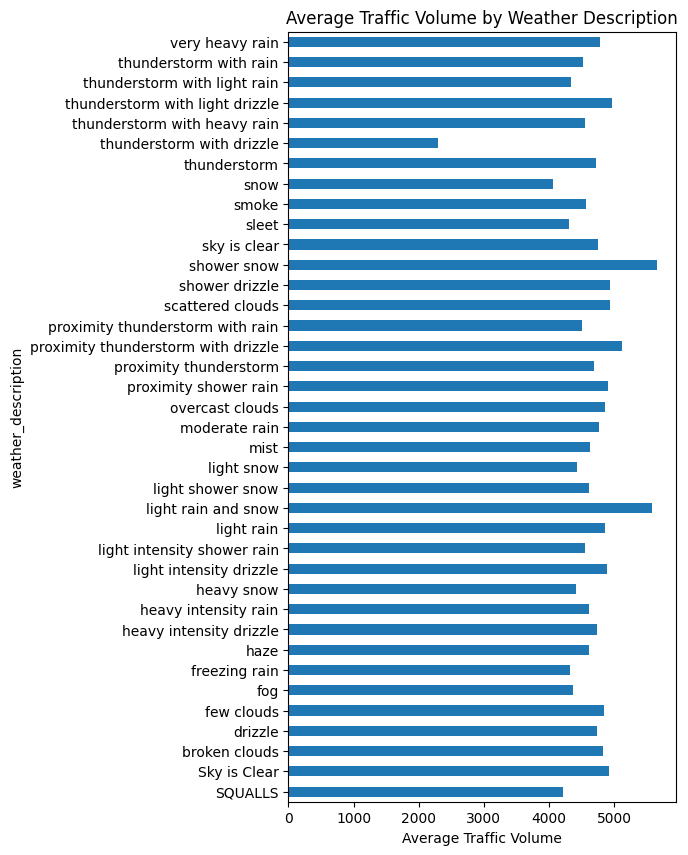

In [30]:
by_weather_description = day.groupby('weather_description')[['traffic_volume']].mean()

by_weather_description['traffic_volume'].plot.barh(figsize=(5, 10))
plt.xlabel('Average Traffic Volume')
plt.title('Average Traffic Volume by Weather Description')
plt.show()


The horizontal barchart for the weather description shows us two weather conditions that exceed an average of 5000 cars: "shower snow" and "light rain and snow". These seem like the most reliable heavy traffic indicators for weather data. 

## Conclusion

Within our analysis of west bound traffic between Minneapolis and St. Paul on I-94, we found a some reliable heavy traffic indicators. In regards to the timing of travel, we found that the warmer months between March and October have heavier traffic on average compared to the colder months. We also found that weekday traffic is much higher on average, especially durring commuting times, versus the weekend. We also found that the weather descriptions 'shower snow' and 'light rain and snow' are associated with average traffic volumes of over 5000 cars an hour. 